# DecisionTreeClassifier

In [1]:
import re
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn import tree
import sys
sys.path.append("..")

from utilities import health_data
from utilities import configuration

import logging


In [2]:
config = configuration.get_config()

experiment_configurations = json.load(open(config['experiments_config'], encoding='utf-8'))
under_sampled_configuration = experiment_configurations['configuration_0'] 
X_train, y_train, X_test, y_test, columns = health_data.Admission.get_train_test_matrices(under_sampled_configuration)


2023-12-21 14:20:06,507 - root - DEBUG - Using X_train, y_train, no samplig strategy ...
2023-12-21 14:20:06,508 - root - DEBUG - Looking for constant variables ...
2023-12-21 14:20:06,509 - root - DEBUG - Using memory efficient solution
2023-12-21 14:26:17,723 - root - DEBUG - Removed 100 columns
2023-12-21 14:26:17,724 - root - DEBUG - Shapes of matrices before FS...
2023-12-21 14:26:17,724 - root - DEBUG - X_train: (416877, 17037)
2023-12-21 14:26:17,725 - root - DEBUG - y_train: (416877,)
2023-12-21 14:26:17,725 - root - DEBUG - X_test:  (104884, 17037)
2023-12-21 14:26:17,726 - root - DEBUG - y_test:  (104884,)


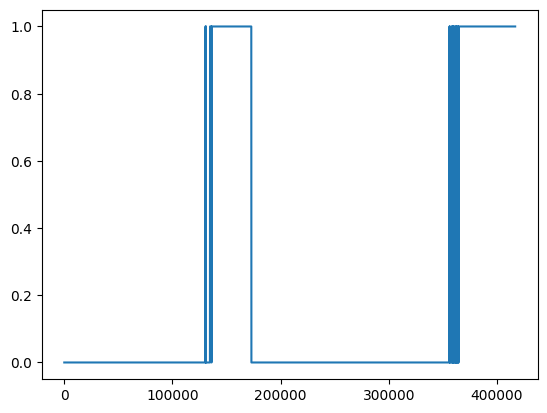

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(len(X_train[:,23].toarray())),X_train[:,23].toarray())

In [3]:
df, main_pt_services_list = health_data.Admission.categorical_features(training)
df

,male,female,transfusion given,is alc,is central zone,elective admission,urgent admission,level 1 comorbidity,level 2 comorbidity,level 3 comorbidity,...,Neurosurgery,OBS Postpartum,Genetics,Paediatric Dermatology,Palliative Care,Nephrology,Dermatology,General Medicine,Paediatric Gynaecology,Neonatology
0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419134,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
419135,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419136,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
419137,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['male', 'female', 'transfusion given', 'is alc', 'is central zone',
       'elective admission', 'urgent admission', 'level 1 comorbidity',
       'level 2 comorbidity', 'level 3 comorbidity', 'level 4 comorbidity',
       'Clinic Entry', 'Direct Entry', 'Emergency Entry', 'Day Surgery Entry',
       'New Acute Patient', 'Panned Readmit', 'Unplanned Readmit',
       'Thoracic Surgery', 'Genetics', 'Radiotherapy', 'Neurosurgery',
       'OBS Delivered', 'Urology', 'Oral Surgery', 'Respirology',
       'Palliative Care', 'Family Practice', 'Rehab in Acute Care Hospital',
       'Paediatric Otolaryngology and ', 'Psychiatry', 'General Surgery',
       'General Medicine', 'Newborn', 'Plastic Surgery', 'Dermatology',
       'Otolaryngology and ORL', 'Paediatric Surgery', 'Transplant Surgery',
       'Paediatric Dermatology', 'OBS Aborted', 'Gynaecology',
       'Paediatric Traumatology', 'Endocrinology', 'Dentistry', 'Nephrology',
       'Paediatric Orthopaedic Surgery', 'Alternate L

### Data & Models

In [2]:
from sklearn.tree import DecisionTreeClassifier

config = configuration.get_config()
model_configurations = json.load(open(config['models_config'], encoding='utf-8'))
experiment_configurations = json.load(open(config['experiments_config'], encoding='utf-8'))

balanced_random_forest_configuration = model_configurations['model_51']
logistic_regression_configuration = model_configurations['model_8']
logistic_regression_configuration['max_iter']=15000
decision_tree_configuration = model_configurations['model_19']
restricted_decision_tree_configuration = model_configurations['model_19'].copy()
restricted_decision_tree_configuration['max_depth']=3

model_names = [
    'Balanced Random Forest',
    'Logistic Regression',
    'Decision Tree',
    'Decision Tree(max_depth=3)'
]

best_models_configurations = [
    balanced_random_forest_configuration,
    logistic_regression_configuration,
    decision_tree_configuration,
    restricted_decision_tree_configuration,
]

configuration_0 = experiment_configurations['configuration_0']

best_models=[]
for configuration_ in best_models_configurations:
    MODEL_SEED = 1270833263
    model_random_state=np.random.RandomState(MODEL_SEED)
    best_models.append(configuration.model_from_configuration(configuration_, random_state=model_random_state))

print('Creating models ...')
for ix, model in enumerate(best_models):
    model_name = str(model)
    model_name = re.sub(r'[\t \n][\t \n]*',' ',model_name)
    print(f'\t{model_names[ix]}')
print()

under_sampled_configuration = experiment_configurations['configuration_0'] 
X_train, y_train, X_test, y_test, columns = health_data.Admission.get_train_test_matrices(under_sampled_configuration)


root = logging.getLogger()
root.setLevel(logging.DEBUG)
root.removeHandler(root.handlers[-1])

print('Creating matrices ...')
for matrix in [X_train, y_train, X_test, y_test]:
    print(f'\t{matrix.shape}')
print()

print('Training models ...')
for model in best_models:
    print(f'\tFitting model {str(model)[:40]} ...')
    model.fit(X_train, y_train)
print()



{0.0: 0.5217392936794599, 1.0: 11.999913644214162}
{0.0: 0.5217392936794599, 1.0: 11.999913644214162}
{0.0: 0.5217392936794599, 1.0: 11.999913644214162}
Creating models ...
	Balanced Random Forest
	Logistic Regression
	Decision Tree
	Decision Tree(max_depth=3)

2023-12-18 15:05:40,434 - root - DEBUG - Using X_train, y_train, no samplig strategy ...
2023-12-18 15:05:40,435 - root - DEBUG - Looking for constant variables ...
2023-12-18 15:05:40,436 - root - DEBUG - Using memory efficient solution
2023-12-18 15:11:45,625 - root - DEBUG - Removed 100 columns
2023-12-18 15:11:45,633 - root - DEBUG - Shapes of matrices before FS...
2023-12-18 15:11:45,637 - root - DEBUG - X_train: (416877, 17036)
2023-12-18 15:11:45,638 - root - DEBUG - y_train: (416877,)
2023-12-18 15:11:45,638 - root - DEBUG - X_test:  (104884, 17036)
2023-12-18 15:11:45,639 - root - DEBUG - y_test:  (104884,)
Creating matrices ...
	(416877, 17036)
	(416877,)
	(104884, 17036)
	(104884,)

Training models ...
	Fitting model 

### Performance (precision, recall, f1score)

In [3]:
print('Evaluating models ...')
data = {
    'Model Name': [],
    'split': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'TP': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC': [], 
}
for ix, model in enumerate(best_models):
        # EVALUATING ON TRAINING        
        y_true = y_train
        y_pred = model.predict(X_train)
        y_score= model.predict_proba(X_train)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        data['Model Name'].append(str(model_names[ix]))
        data['split'].append('TRAIN')
        data['TN'].append(tn)
        data['TP'].append(tp)
        data['FP'].append(fp)
        data['FN'].append(fn)
        data['Precision'].append(precision_score(y_true, y_pred,))
        data['Recall'].append(recall_score(y_true, y_pred,))
        data['F1-Score'].append(f1_score(y_true, y_pred,))
        data['AUC'].append(roc_auc_score(y_true=y_true, y_score=y_pred))

        # EVALUATING ON TESTING
        y_true = y_test
        y_pred = model.predict(X_test)
        y_score= model.predict_proba(X_test)

        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
        data['Model Name'].append(str(model_names[ix]))

        data['split'].append('TEST')
        data['TN'].append(tn)
        data['TP'].append(tp)
        data['FP'].append(fp)
        data['FN'].append(fn)
        data['Precision'].append(precision_score(y_true, y_pred,))
        data['Recall'].append(recall_score(y_true, y_pred,))
        data['F1-Score'].append(f1_score(y_true, y_pred,))
        data['AUC'].append(roc_auc_score(y_true=y_true, y_score=y_pred))
df = pd.DataFrame(data)


test_df = df [df['split']=='TEST']
test_df.drop(columns=['split','TN','FP','FN','TP'])

Evaluating models ...


,Model Name,Precision,Recall,F1-Score,AUC
1,Balanced Random Forest,0.079776,0.738804,0.144003,0.676923
3,Logistic Regression,0.081623,0.651004,0.145059,0.660068
5,Decision Tree,0.072680,0.698213,0.131656,0.647903
7,Decision Tree(max_depth=3),0.060251,0.753585,0.111581,0.611324


### Performance (Confusion matrix)

In [7]:

for row_ix in range(test_df.shape[0]):
    row = test_df.iloc[row_ix,:]
    model_name = row['Model Name']
    tn = row['TN']
    tp = row['TP']
    fp = row['FP']
    fn = row['FN']
    csv_str = f'{model_name};;True Class;\n'
    csv_str += ';;Negative;Positive\n'
    csv_str += f'Predicted Class;Negative;{tn};{fn}\n'
    csv_str += f';Positive;{fp};{tp}\n'

    print(csv_str)
    print()
    
    

Balanced Random Forest;;True Class;
;;Negative;Positive
Predicted Class;Negative;61720;1184
;Positive;38631;3349


Logistic Regression;;True Class;
;;Negative;Positive
Predicted Class;Negative;67148;1582
;Positive;33203;2951


Decision Tree;;True Class;
;;Negative;Positive
Predicted Class;Negative;59969;1368
;Positive;40382;3165


Decision Tree(max_depth=3);;True Class;
;;Negative;Positive
Predicted Class;Negative;47071;1117
;Positive;53280;3416




### Performance (AUC curve)

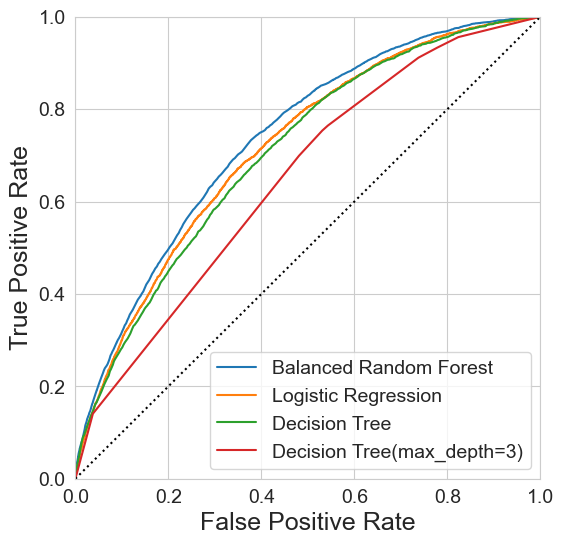

In [11]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(
    1,
    figsize=(6,6)
    )

for ix, model in enumerate(best_models):
    fpr, tpr, threshold = roc_curve(y_true=y_test, 
                                    y_score=model.predict_proba(X_test)[:,1]
                                    )
    ax.plot(fpr,tpr, label=model_names[ix])

ax.plot([0,1],[0,1],ls=':', color='black')
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.legend(fontsize=14)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)


fig.savefig(os.path.join(config['figures_folder'], 'AUC_curves.png'), bbox_inches='tight')

### Decision Tree plots

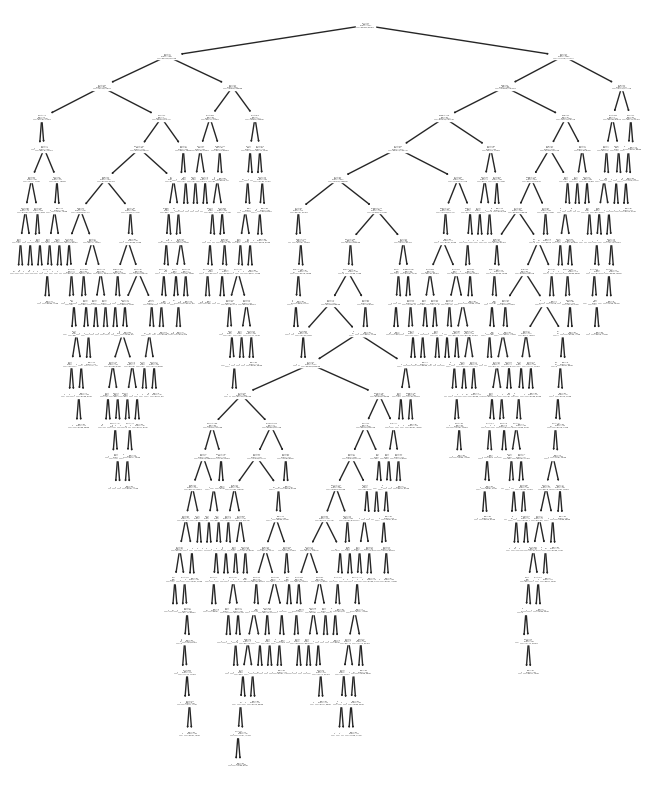

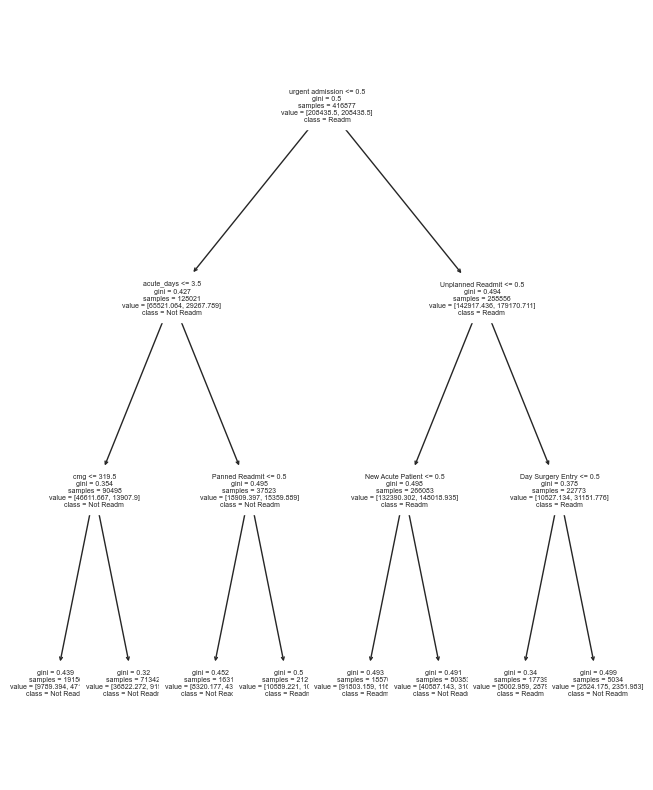

In [92]:
fig, ax = plt.subplots(1, figsize=(8,10))


decision_tree_model =  best_models[model_names.index('Decision Tree')]
restricted_decision_tree_configuration = best_models[model_names.index('Decision Tree(max_depth=3)')]

tree.plot_tree(decision_tree_model,
               ax=ax, 
            #    fontsize=18,
            #    feature_names=features_name,
               )
fig.savefig(os.path.join(config['figures_folder'], 'complicated_decisiont_tree.png'), bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(8,10))

tree.plot_tree(restricted_decision_tree_configuration,
               ax=ax, 
               fontsize=5,
               feature_names=list(columns),
               class_names=['Not Readm', 'Readm']
               )
fig.savefig(os.path.join(config['figures_folder'], 'decision_tree_depth_3.png'), bbox_inches='tight')


### Logistic Regression Coefficients


In [93]:

features_name = columns

diagnosis_mapping = health_data.Admission.get_diagnoses_mapping()
intervention_mapping = health_data.Admission.get_intervention_mapping()

logistic_regression_model = best_models[model_names.index('Logistic Regression')]
scored_features = [(features_name[ix], logistic_regression_model.coef_[0,ix] ) for ix in range(X_train.shape[1])]

scored_features = sorted(scored_features, key=lambda x: np.abs(x[1]))

# Most 
data = {
    'Feature': [],
    'Score': [],
    'Description' : [],
}

top_k=10

for name, score in scored_features[-top_k:][::-1]:
    assert name not in diagnosis_mapping and name not in intervention_mapping
    if name.upper() in diagnosis_mapping or name.upper() in intervention_mapping:
        data['Feature'].append(name.upper())
        if name.upper() in diagnosis_mapping:
            data['Description'].append(diagnosis_mapping[name.upper()])
        else:
            data['Description'].append(intervention_mapping[name.upper()])
    else:
        data['Feature'].append(name)
        data['Description'].append('---')
    data['Score'].append(score)

data['Score'].append('...')
data['Description'].append('...')
data['Feature'].append('...')

for name, score in scored_features[:top_k][::-1]:
    assert name not in diagnosis_mapping and name not in intervention_mapping
    if name.upper() in diagnosis_mapping or name.upper() in intervention_mapping:
        data['Feature'].append(name.upper())
        if name.upper() in diagnosis_mapping:
            data['Description'].append(diagnosis_mapping[name.upper()])
        else:
            data['Description'].append(intervention_mapping[name.upper()])
    else:
        data['Feature'].append(name)
        data['Description'].append(name)
    data['Score'].append(score)

pd.DataFrame(data)

,Feature,Score,Description
0,I469,-4.917554,"{'Cardiac arrest, unspecified'}"
1,M161,-3.501857,"{'Other primary coxarthrosis', 'Coxarthrosis, ..."
2,T84033,3.325594,"{'Mechanical complication of hip prosthesis, b..."
3,C920,2.897901,{'Acute myeloblastic leukaemia [AML]'}
4,D828,2.695422,{'Immunodeficiency associated with other speci...
5,D806,2.572832,{'Antibody deficiency with near-normal immunog...
6,G932,2.560348,{'Benign intracranial hypertension'}
7,I634,-2.550895,"{'Cerebral infarction, unspecified', 'Cerebral..."
8,1VC93LA,-2.520831,"{'Amputation, femur using simple apposition te..."
9,1WA03HAKC,2.492084,"{'Immobilization, ankle joint using percutaneo..."


### SHAP plots

In [17]:
from sklearn.linear_model import LogisticRegression
import shap
import json
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd

import sys
sys.path.append('..')

from utilities import configuration
from utilities import health_data

In [106]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    data = {
        'Model Name': [],
        'split': [],
        'TN': [],
        'FP': [],
        'FN': [],
        'TP': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'AUC': [], 
    }
    # EVALUATING ON TRAINING        
    y_true = y_train
    y_pred = model.predict(X_train)
    y_score= model.predict_proba(X_train)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    data['Model Name'].append(str(model))
    data['split'].append('TRAIN')
    data['TN'].append(tn)
    data['TP'].append(tp)
    data['FP'].append(fp)
    data['FN'].append(fn)
    data['Precision'].append(precision_score(y_true, y_pred,))
    data['Recall'].append(recall_score(y_true, y_pred,))
    data['F1-Score'].append(f1_score(y_true, y_pred,))
    data['AUC'].append(roc_auc_score(y_true=y_true, y_score=y_pred))

    # EVALUATING ON TESTING
    y_true = y_test
    y_pred = model.predict(X_test)
    y_score= model.predict_proba(X_test)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    data['Model Name'].append(str(model))

    data['split'].append('TEST')
    data['TN'].append(tn)
    data['TP'].append(tp)
    data['FP'].append(fp)
    data['FN'].append(fn)
    data['Precision'].append(precision_score(y_true, y_pred,))
    data['Recall'].append(recall_score(y_true, y_pred,))
    data['F1-Score'].append(f1_score(y_true, y_pred,))
    data['AUC'].append(roc_auc_score(y_true=y_true, y_score=y_pred))
    return pd.DataFrame(data)


In [107]:
# ---------- ---------- ---------- ---------- ---------- ---------- ---------- ---------- 
# Random Undersampling
# ---------- ---------- ---------- ---------- ---------- ---------- ---------- ---------- 
SAMPLING_SEED = 1270833263
sampling_random_state=np.random.RandomState(SAMPLING_SEED)
under_sampler = RandomUnderSampler(sampling_strategy=1.0, 
                                   random_state=sampling_random_state)

X_train_undersampled, y_train_undersampled = under_sampler.fit_resample(X_train, 
                                                                        y_train)

X_test_undersampled = X_test
y_test_undersampled = y_test



print('After under sampling')
print(f'X_train_undersampled.shape={X_train_undersampled.shape}')
print(f'y_train_undersampled.shape={y_train_undersampled.shape}')

print(f'X_test_undersampled.shape= {X_test_undersampled.shape}')
print(f'y_test_undersampled.shape= {y_test_undersampled.shape}')
print()

MODEL_SEED = 1270833263
model_random_state=np.random.RandomState(MODEL_SEED)
under_sampling_results = train_and_evaluate(LogisticRegression(max_iter=15000, random_state=model_random_state), 
                                            X_train_undersampled, 
                                            y_train_undersampled, 
                                            X_test_undersampled, 
                                            y_test_undersampled
                                            )

# ---------- ---------- ---------- ---------- ---------- ---------- ---------- ---------- 
# Feature selection
# ---------- ---------- ---------- ---------- ---------- ---------- ---------- ---------- 
clf = SelectKBest(f_classif, k=30, ).fit(X_train, y_train)

X_train_fs = clf.transform(X_train_undersampled)
y_train_fs = y_train_undersampled 

X_test_fs = clf.transform(X_test_undersampled)
y_test_fs = y_test_undersampled 

MODEL_SEED = 1270833263
model_random_state=np.random.RandomState(MODEL_SEED)

feature_selection_results = train_and_evaluate(LogisticRegression(max_iter=15000, random_state=model_random_state), 
                                               X_train_fs, 
                                               y_train_fs, 
                                               X_test_fs, 
                                               y_test_fs)


columns_fs = clf.transform(columns.reshape(1,-1))[0,:]

print('After feature selection')
print(f'X_train_fs.shape={X_train_fs.shape}')
print(f'y_train_fs.shape={y_train_fs.shape}')

print(f'X_test_fs.shape= {X_test_fs.shape}')
print(f'y_test_fs.shape= {y_test_fs.shape}')


After under sampling
X_train_undersampled.shape=(34740, 17036)
y_train_undersampled.shape=(34740,)
X_test_undersampled.shape= (104884, 17036)
y_test_undersampled.shape= (104884,)

After feature selection
X_train_fs.shape=(34740, 30)
y_train_fs.shape=(34740,)
X_test_fs.shape= (104884, 30)
y_test_fs.shape= (104884,)


In [108]:

MODEL_SEED = 1270833263
model_random_state=np.random.RandomState(MODEL_SEED)
auxclf = LogisticRegression(max_iter=15000, random_state=model_random_state)
auxclf.fit(X_train_undersampled, y_train_undersampled)
scored_features = [(columns[ix], auxclf.coef_[0,ix] ) for ix in range(X_train_undersampled.shape[1])]

scored_features = sorted(scored_features, key=lambda x: np.abs(x[1]))
assert len(auxclf.coef_[0,:])==len(columns)

top_k=10

for name, score in scored_features[-top_k:][::-1]:
    if name.upper() in diagnosis_mapping: 
        description = diagnosis_mapping[name.upper()]
    if name.upper() in intervention_mapping: 
        description = intervention_mapping[name.upper()]
    print(f'{name.upper():8}: {str(description)[:50]}')

under_sampling_results

I469    : {'Cardiac arrest, unspecified'}
Z5180   : {'Pain management planning'}
M161    : {'Other primary coxarthrosis', 'Coxarthrosis, unsp
1FR89WJ : {'Excision total, tonsils and adenoids tonsillecto
C799    : {'Secondary malignant neoplasm, unspecified site'}
C920    : {'Acute myeloblastic leukaemia [AML]'}
T84033  : {'Mechanical complication of hip prosthesis, break
T8453   : {'Other complications of internal orthopaedic pros
I634    : {'Cerebral infarction, unspecified', 'Cerebral inf
J849    : {'Interstitial pulmonary disease, unspecified'}


,Model Name,split,TN,FP,FN,TP,Precision,Recall,F1-Score,AUC
0,"LogisticRegression(max_iter=15000,\n ...",TRAIN,11797,5573,4663,12707,0.695131,0.731549,0.712875,0.705354
1,"LogisticRegression(max_iter=15000,\n ...",TEST,63817,36534,1449,3084,0.077843,0.680344,0.139702,0.658141


In [109]:
MODEL_SEED = 1270833263
model_random_state=np.random.RandomState(MODEL_SEED)
auxclf = LogisticRegression(max_iter=15000, random_state=model_random_state)
auxclf.fit(X_train_fs, y_train_fs)
scored_features = [(columns_fs[ix], auxclf.coef_[0,ix] ) for ix in range(X_train_fs.shape[1])]

scored_features = sorted(scored_features, key=lambda x: np.abs(x[1]))
assert len(auxclf.coef_[0,:])==len(columns_fs)

top_k=10

for name, score in scored_features[-top_k:][::-1]:
    if name.upper() in diagnosis_mapping: 
        description = diagnosis_mapping[name.upper()]
    if name.upper() in intervention_mapping: 
        description = intervention_mapping[name.upper()]
    print(f'{name.upper():8}: {str(description)[:50]}')
feature_selection_results

Y833    : {'Other medical procedures as the cause of abnorma
C920    : {'Acute myeloblastic leukaemia [AML]'}
Z511    : {'Chemotherapy session for neoplasm'}
K729    : {'Hepatic failure, unspecified'}
R18     : {'Ascites'}
5MD50AA : {'Manually assisted vaginal delivery (vertex), wit
Z37000  : {'Single live birth, pregnancy resulting from both
UNPLANNED READMIT: {'Single live birth, pregnancy resulting from both
J441    : {'Chronic obstructive pulmonary disease, unspecifi
1OT52HATS: {'Drainage, abdominal cavity using percutaneous (n


,Model Name,split,TN,FP,FN,TP,Precision,Recall,F1-Score,AUC
0,"LogisticRegression(max_iter=15000,\n ...",TRAIN,9681,7689,5439,11931,0.608104,0.686874,0.645093,0.622107
1,"LogisticRegression(max_iter=15000,\n ...",TEST,56019,44332,1415,3118,0.065711,0.687845,0.119962,0.623038


In [34]:
data = {
    'Feature Name': [],
    'Score': [],
    'Description': [],
}

for column_name, score in sorted(list(zip(columns_fs, clf.scores_)), key=lambda x: x[1])[::-1]:
    data['Feature Name'].append(column_name)
    data['Score'].append(score)
    data['Description'].append(column_name)
    assert not column_name in diagnosis_mapping and not column_name in intervention_mapping

    if column_name.upper() in diagnosis_mapping:
        data['Description'][-1] = diagnosis_mapping[column_name.upper()]
        data['Feature Name'][-1] = column_name.upper()
        assert not column_name.upper() in intervention_mapping

    if column_name.upper() in intervention_mapping:
        data['Description'][-1] = intervention_mapping[column_name.upper()]
        data['Feature Name'][-1] = column_name.upper()
        assert not column_name.upper() in diagnosis_mapping

print(pd.DataFrame(data).to_csv(sep=';', index=None))
pd.DataFrame(data)

Feature Name;Score;Description
R18;3170.2113638429196;{'Ascites'}
Orthopaedic Surgery;2380.0082671713194;Orthopaedic Surgery
C920;2357.8448027228105;{'Acute myeloblastic leukaemia [AML]'}
Unplanned Readmit;1612.7467554051723;Unplanned Readmit
J441;1539.0225497441922;{'Chronic obstructive pulmonary disease, unspecified', 'Chronic obstructive pulmonary disease with acute exacerbation, unspecified', 'Invalid Code', 'Chronic obstructive pulmonary disease with acute lower respiratory infection'}
Family Practice;1348.2293076125106;Family Practice
Psychiatry;896.5896569023139;Psychiatry
K729;509.0437999199661;{'Hepatic failure, unspecified'}
Emergency Entry;427.7107934624234;Emergency Entry
Haematology;400.66560925622156;Haematology
age;375.5724849056494;age
transfusion given;166.4897260103422;transfusion given
New Acute Patient;159.49843646485;New Acute Patient
level 1 comorbidity;148.9546281165044;level 1 comorbidity
urgent admission;147.39678290321726;urgent admission
Newborn;100.735160355

,Feature Name,Score,Description
0,R18,3170.211364,{'Ascites'}
1,Orthopaedic Surgery,2380.008267,Orthopaedic Surgery
2,C920,2357.844803,{'Acute myeloblastic leukaemia [AML]'}
3,Unplanned Readmit,1612.746755,Unplanned Readmit
4,J441,1539.022550,"{'Chronic obstructive pulmonary disease, unspe..."
5,Family Practice,1348.229308,Family Practice
6,Psychiatry,896.589657,Psychiatry
7,K729,509.043800,"{'Hepatic failure, unspecified'}"
8,Emergency Entry,427.710793,Emergency Entry
9,Haematology,400.665609,Haematology


In [56]:
transformed_columns=[]
for column_name in columns_fs:
    if column_name.upper() in diagnosis_mapping:
        transformed_columns.append(f'{column_name.upper()}: '+str(diagnosis_mapping[column_name.upper()])[:30])
    elif column_name.upper() in intervention_mapping:
        transformed_columns.append(f'{column_name.upper()}: '+str(intervention_mapping[column_name.upper()])[:30])
    else:
        transformed_columns.append(column_name.title())
transformed_columns

X_train_df = pd.DataFrame(X_train_fs.toarray(), columns=transformed_columns)
X_train_df

,Age,Transfusion Given,Elective Admission,Urgent Admission,Level 1 Comorbidity,Level 2 Comorbidity,Direct Entry,Emergency Entry,New Acute Patient,Panned Readmit,...,J441: {'Chronic obstructive pulmonar,"K729: {'Hepatic failure, unspecified",R18: {'Ascites'},Y833: {'Other medical procedures as,"Z37000: {'Single live birth, pregnancy","Z38000: {'Singleton, born in hospital,",Z511: {'Chemotherapy session for neo,"1OT52HATS: {'Drainage, abdominal cavity u","1ZZ35HAM2: {'Pharmacotherapy, total body",5MD50AA: {'Manually assisted vaginal de
0,83.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34735,86.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34736,76.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34737,93.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34738,76.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SHAP ON TRAINING

PermutationExplainer explainer: 34741it [03:36, 155.02it/s]                           


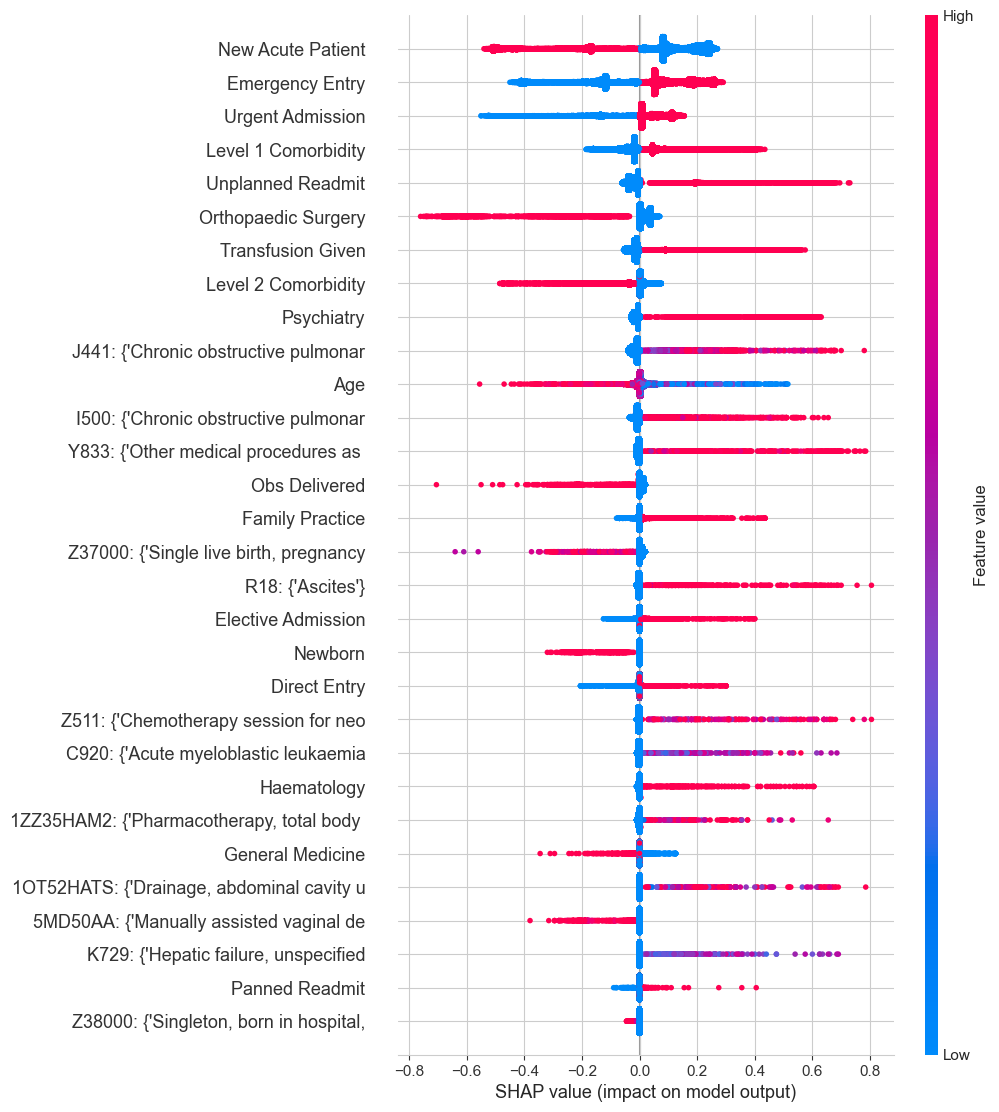

In [72]:
# MODEL
MODEL_SEED = 1270833263
model_random_state=np.random.RandomState(MODEL_SEED)
model = LogisticRegression(max_iter=15000, random_state=model_random_state)
model.fit(X_train_df, y_train_fs)


# EXPLAINER (test):


X100 = shap.utils.sample(X_train_df, 1000)  # 100 instances for use as the background distribution
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_train_df, max_evals=2*X_train_df.shape[1]+1)


shap.plots.beeswarm(shap_values,
                    max_display=30,
                    )


### SHAP ON TEST

PermutationExplainer explainer: 104885it [11:05, 154.76it/s]                            


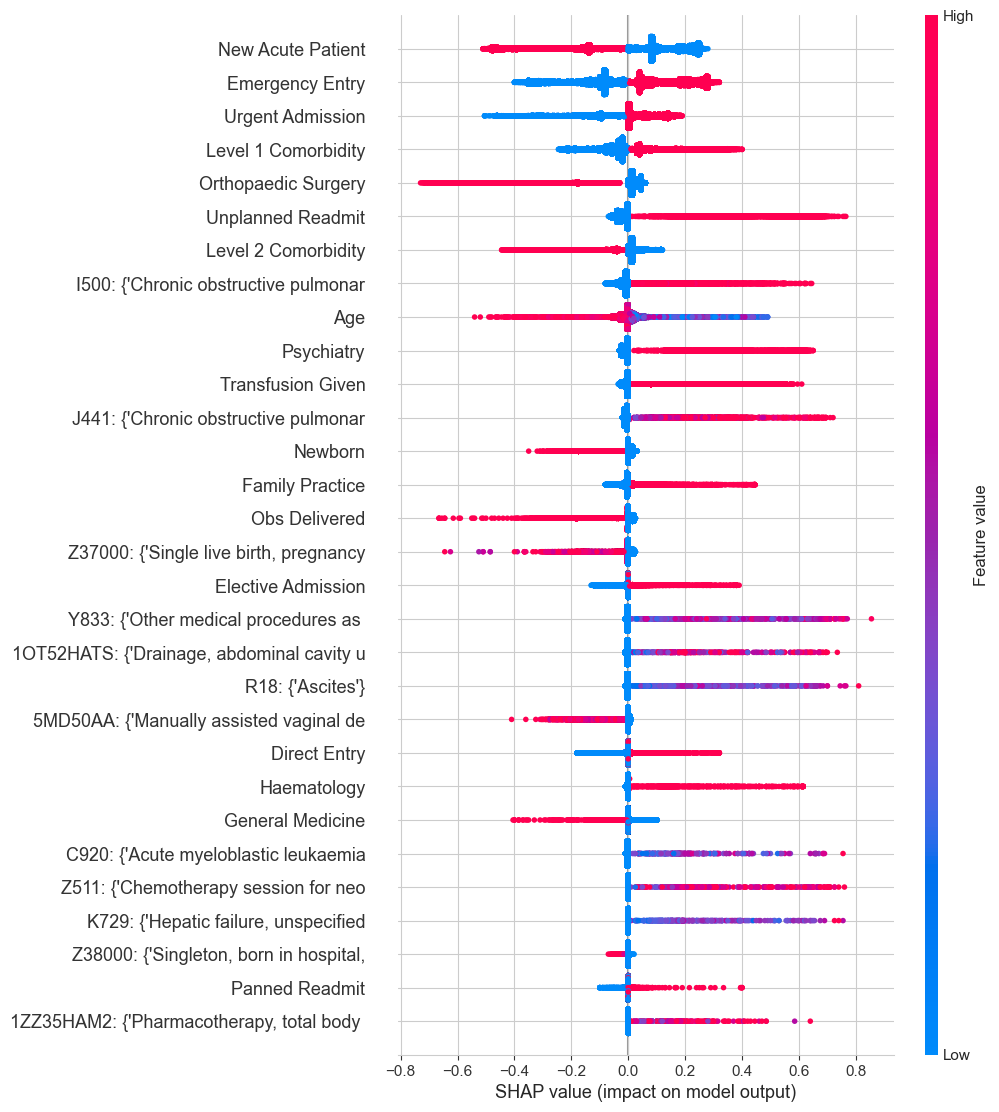

In [57]:

# EXPLAINER (test):
X_test_df = pd.DataFrame(X_test_fs.toarray(), columns=transformed_columns)


X100 = shap.utils.sample(X_test_df, 1000)  # 100 instances for use as the background distribution
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_test_df, max_evals=2*X_test_df.shape[1]+1)


shap.plots.beeswarm(shap_values,
                    max_display=30,
                    )


### Examples (x4)

In [70]:
yhat = model.predict(X_test_df)
y_true = y_test_fs



true_negatives = np.array(range(len(yhat)))[(yhat==y_true) & (yhat==0)]
true_positives = np.array(range(len(yhat)))[(yhat==y_true) & (yhat==1)]
false_positives = np.array(range(len(yhat)))[(yhat!=y_true) & (yhat==1)]
false_negatives =  np.array(range(len(yhat)))[(yhat!=y_true) & (yhat==0)]

SEED = 1846788343156670281
rng = np.random.default_rng(seed=SEED)

example_true_negative = rng.choice(true_negatives, size=1)[0]
example_true_positive = rng.choice(true_positives, size=1)[0]
example_false_positive = rng.choice(false_positives, size=1)[0]
example_false_negative = rng.choice(false_negatives, size=1)[0]

print(f'True Negative:   {example_true_negative}')
print(f'True Positive:   {example_true_positive}')
print(f'False Positives: {example_false_positive}')
print(f'False Negative:  {example_false_negative}')



True Negative:   78436
True Positive:   85004
False Positives: 77838
False Negative:  65519


X does not have valid feature names, but LogisticRegression was fitted with feature names


EXAMPLE TRUE NEGATIVE


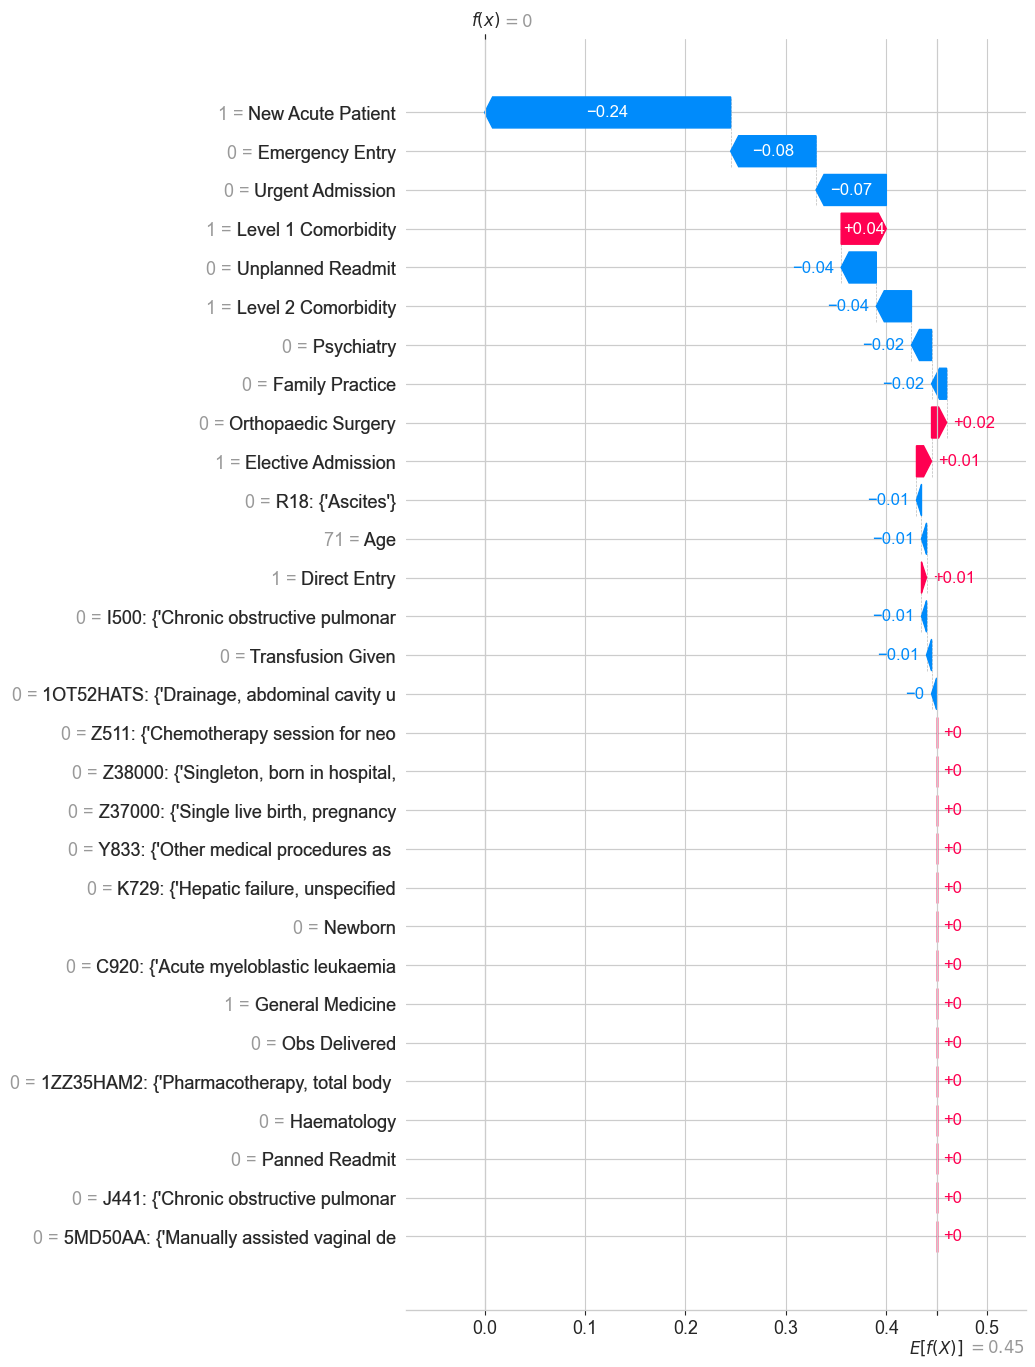

EXAMPLE TRUE POSITVE


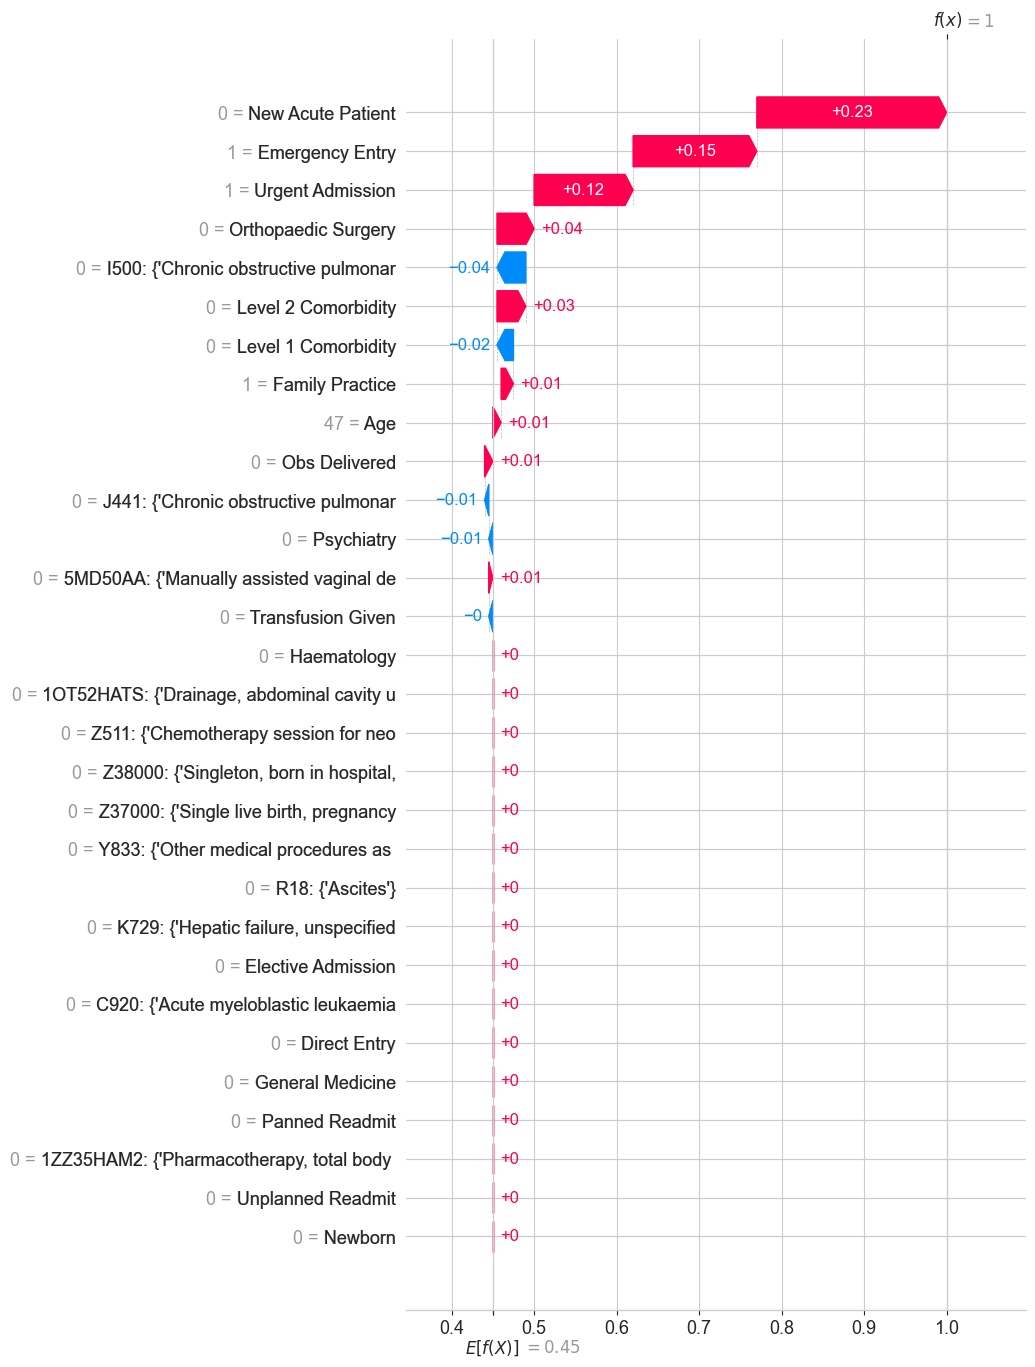

EXAMPLE FALSE POSITVE


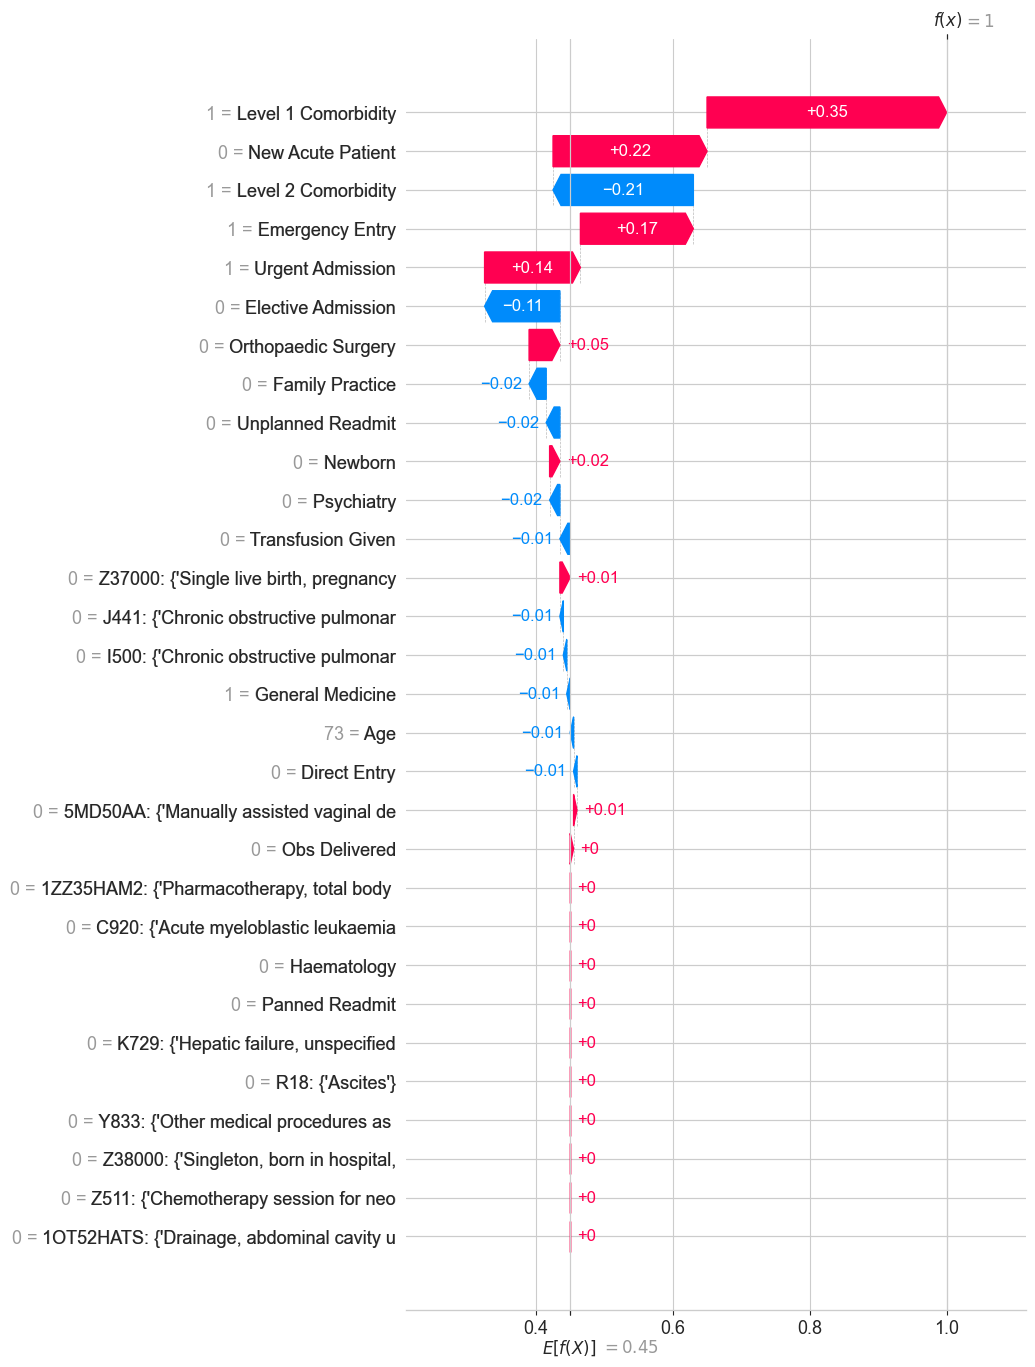

EXAMPLE FALSE NEGATIVE


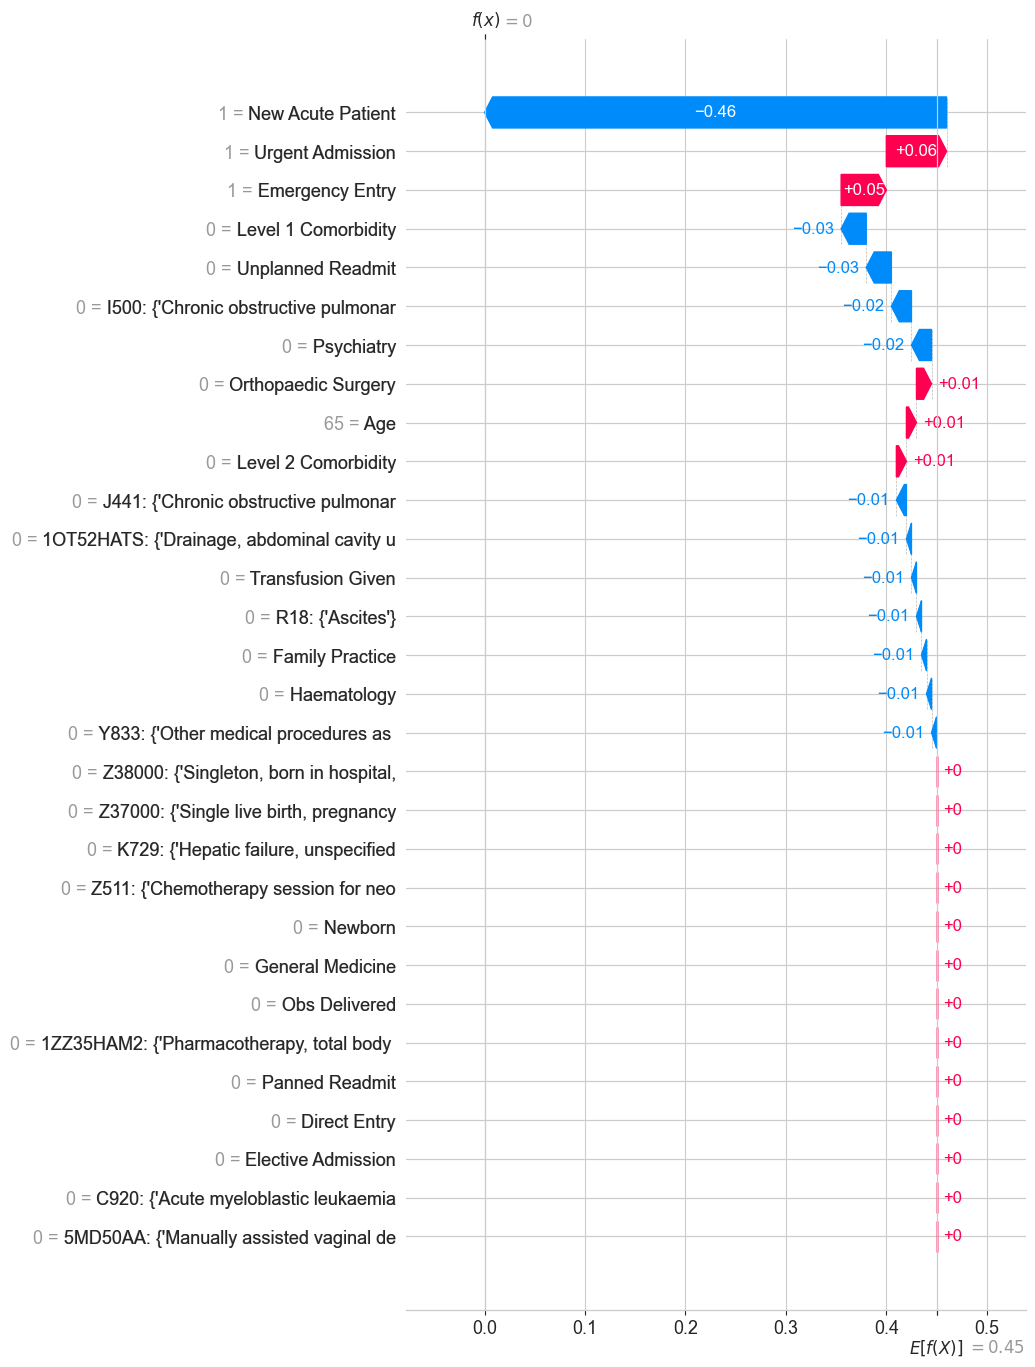

In [71]:
yhat = model.predict(X_test_fs)

print('EXAMPLE TRUE NEGATIVE')
shap.plots.waterfall(shap_values[example_true_negative], max_display=30)

print('EXAMPLE TRUE POSITVE')
shap.plots.waterfall(shap_values[example_true_positive], max_display=30)

print('EXAMPLE FALSE POSITVE')
shap.plots.waterfall(shap_values[example_false_positive], max_display=30)

print('EXAMPLE FALSE NEGATIVE')
shap.plots.waterfall(shap_values[example_false_negative], max_display=30)

